<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
gws.head()


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0,0,0,0,454,0,0,10,0,0,0,0,454,0,0,2016-08-15T19:00:00Z,15/08/20 20:00,0,0,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0,0,0,0,0,55,FALSE,0,0
1,Aaron_Lennon,0,3,0,0,0,6,0,1,2,0.3,0,0,142,0,0,3,0,0,0,0.9,142,8.2,0,2016-08-13T14:00:00Z,13/08/20 15:00,0,0,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,0,1,0,0,0,60,TRUE,0,0
2,Aaron_Ramsey,0,26,0,0,0,5,0,2,22,4.9,1,0,16,0,0,8,0,3,0,3,16,2.2,0,2016-08-14T15:00:00Z,14/08/20 16:00,0,0,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,23,2,0,0,0,80,TRUE,0,0
3,Abdoulaye_Doucouré,0,0,0,0,0,0,0,0,0,0,0,0,482,0,0,7,0,0,0,0,482,0,0,2016-08-13T14:00:00Z,13/08/20 15:00,0,0,0,0,0,13,0,0,0,0,0,0,1,0,1051,0,0,0,1,1,0,0,0,0,0,50,FALSE,0,0
4,Abdul Rahman_Baba,0,0,0,0,0,0,0,0,0,0,0,0,80,0,0,10,0,0,0,0,80,0,0,2016-08-15T19:00:00Z,15/08/20 20:00,0,0,0,0,0,20,0,0,0,0,0,0,1,0,1243,0,0,0,1,2,0,0,0,0,0,55,TRUE,0,0


In [137]:
gws=gws.astype({'name':'category','assists':int, 'attempted_passes':int, 'big_chances_created':int,
       'big_chances_missed':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'clearances_blocks_interceptions':int, 'completed_passes':int, 'creativity':float,
       'dribbles':int, 'ea_index':int, 'element':int, 'errors_leading_to_goal':int,
       'errors_leading_to_goal_attempt':int, 'fouls':int, 'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float, 'key_passes':int,
      'loaned_in':int, 'loaned_out':int,'minutes':int, 'offside':int, 'open_play_crosses':int, 'opponent_team':int, 'own_goals':int,
       'penalties_conceded':int, 'penalties_missed':int, 'penalties_saved':int,
       'recoveries':int, 'red_cards':int, 'round':int, 'saves':int, 'selected':int, 'tackled':int,
       'tackles':int, 'target_missed':int, 'team_a_score':int, 'team_h_score':int, 'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int,'winning_goals':int, 'yellow_cards':'int'})

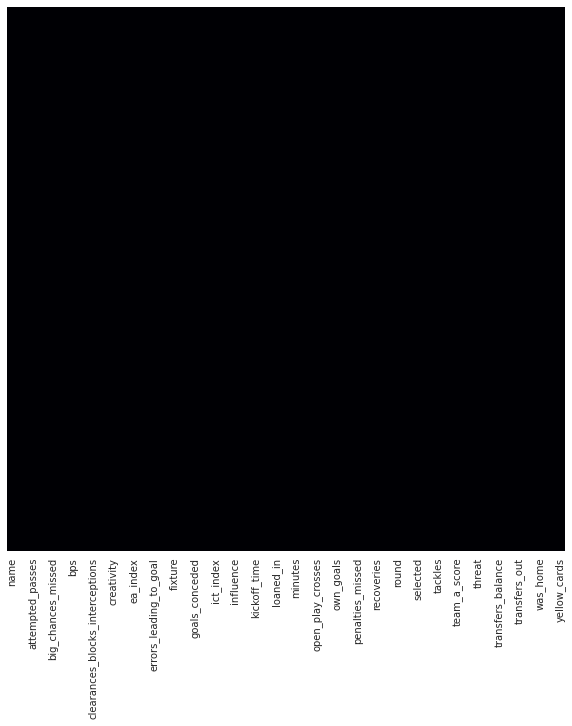

In [138]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno',)

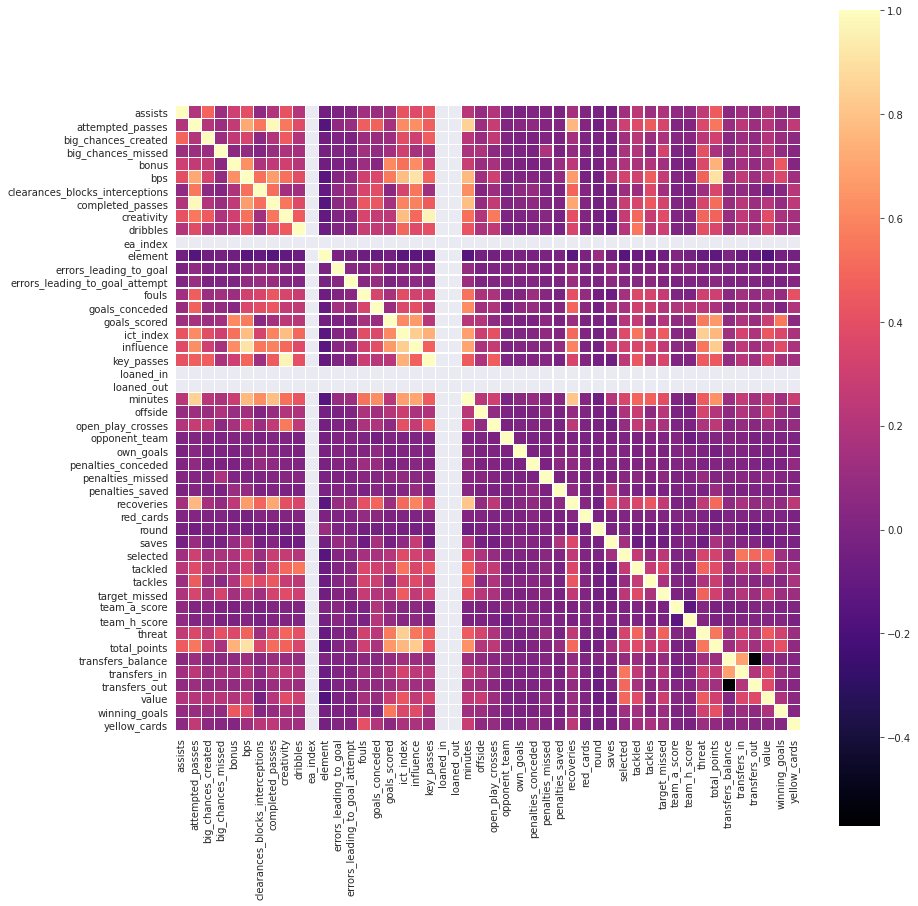

In [139]:
plt.figure(figsize=(14,15))
sns.heatmap(gws.corr(),cmap='magma',square=True, linewidths=0.2)

In [140]:
c=gws.corr().abs()
cor_target = c['total_points']
relevant_features = cor_target[cor_target>0.3]
relevant_features

#upper = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
#to_drop=[column for column in upper.columns if any(upper[column] > 0.70)]
#to_drop
#s=c.unstack()
#so = pd.DataFrame(s.sort_values(kind="quicksort",ascending=False))
#so



assists                            0.454575
attempted_passes                   0.551863
big_chances_created                0.313001
bonus                              0.746158
bps                                0.906537
clearances_blocks_interceptions    0.349706
completed_passes                   0.518646
creativity                         0.483793
dribbles                           0.351093
fouls                              0.304352
goals_scored                       0.661167
ict_index                          0.762474
influence                          0.832273
key_passes                         0.446043
minutes                            0.640069
recoveries                         0.507715
selected                           0.323567
tackled                            0.385687
target_missed                      0.311124
threat                             0.550237
total_points                       1.000000
value                              0.308651
winning_goals                   

In [141]:
upper = c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
to_drop=[column for column in upper.columns if any(upper[column] > 0.70)]
to_drop

['bps',
 'completed_passes',
 'ict_index',
 'influence',
 'key_passes',
 'minutes',
 'recoveries',
 'threat',
 'total_points']

In [142]:
gws1=gws.drop(['completed_passes',
 'influence',
 'key_passes',
 'threat',
 'transfers_in','ea_index','loaned_in','loaned_out'],axis=1)

In [144]:
gws1.drop(['kickoff_time'], axis=1,inplace=True)

In [145]:
gws1['kickoff_time_formatted']=pd.to_datetime(gws1['kickoff_time_formatted'])

In [146]:
def was_home(x):
  if x=="FALSE":
    return 0
  else:
    return 1

In [147]:
gws1['home']=gws1['was_home'].apply(was_home)

In [148]:
gws1.drop('was_home',axis=1, inplace=True)

In [149]:
gws1['kickoff_time'] = gws1.kickoff_time_formatted.dt.hour


In [150]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [151]:
gws1['kickoff_time']=gws1['kickoff_time'].apply(time)


In [152]:
gws1.drop(['kickoff_time_formatted'],axis=1,inplace=True)


In [153]:
gws1.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,creativity,dribbles,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,total_points,transfers_balance,transfers_out,value,winning_goals,yellow_cards,home,kickoff_time
0,Aaron_Cresswell,0,0,0,0,0,0,0,0,0.0,0,454,0,0,10,0,0,0,0.0,454,0,0,0,4,0,0,0,0,0,0,1,0,14023,0,0,0,1,2,0,0,0,55,0,0,0,2
1,Aaron_Lennon,0,3,0,0,0,6,0,1,0.3,0,142,0,0,3,0,0,0,0.9,142,15,0,0,17,0,0,0,0,1,0,1,0,13918,1,2,0,1,1,1,0,0,60,0,0,1,1
2,Aaron_Ramsey,0,26,0,0,0,5,0,2,4.9,1,16,0,0,8,0,3,0,3.0,16,60,0,0,9,0,0,0,0,2,0,1,0,163170,2,0,1,4,3,2,0,0,80,0,0,1,1
3,Abdoulaye_Doucouré,0,0,0,0,0,0,0,0,0.0,0,482,0,0,7,0,0,0,0.0,482,0,0,0,13,0,0,0,0,0,0,1,0,1051,0,0,0,1,1,0,0,0,50,0,0,0,1
4,Abdul Rahman_Baba,0,0,0,0,0,0,0,0,0.0,0,80,0,0,10,0,0,0,0.0,80,0,0,0,20,0,0,0,0,0,0,1,0,1243,0,0,0,1,2,0,0,0,55,0,0,1,2


In [154]:
from sklearn.model_selection import train_test_split
X=gws1.drop(['name','total_points'],axis=1)
y=gws1['total_points']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
model.coef_

array([ 1.45375992e+00, -8.37418403e-03, -5.43158399e-01,  5.20295528e-01,
        1.09032263e+00,  1.71333068e-01,  1.08165550e+00, -7.90430472e-02,
       -1.07439558e-02, -1.45981947e-01, -2.21164230e-05,  2.78792652e-01,
        7.35923955e-02, -5.28770430e-05,  1.62155404e-01, -2.47263374e-01,
        1.32346591e+00, -2.03424011e-02, -1.68545670e-05,  1.37886651e-02,
        1.01071412e-01, -9.51120034e-02, -4.07715527e-04, -1.22548547e+00,
        4.38227862e-01, -9.36110078e-01,  2.25598533e+00, -5.27930476e-02,
       -1.13917653e+00,  1.06659362e-02, -6.69056847e-02, -4.70347703e-08,
        1.97229392e-01, -3.41601242e-01,  1.54279496e-01, -4.74151718e-03,
        2.68070831e-03, -7.96502770e-07, -9.96833198e-07,  9.18667621e-05,
       -7.56294528e-01, -4.77571729e-01,  3.92295740e-03,  6.16290534e-04])

In [157]:
cdf=pd.DataFrame(model.coef_,X_train.columns,columns=['Coeff'])

In [158]:
cdf

,Coeff
assists,1.453760e+00
attempted_passes,-8.374184e-03
big_chances_created,-5.431584e-01
big_chances_missed,5.202955e-01
bonus,1.090323e+00
bps,1.713331e-01
clean_sheets,1.081656e+00
clearances_blocks_interceptions,-7.904305e-02
creativity,-1.074396e-02
dribbles,-1.459819e-01


In [159]:
predict=model.predict(X_test)

In [160]:
predict

array([0.02574089, 0.49818176, 0.06440111, ..., 1.55897653, 0.06043956,
       0.06383709])

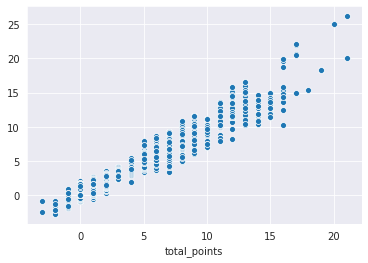

In [161]:
sns.scatterplot(y_test,predict)
#plt.scatter(y_test,predict)

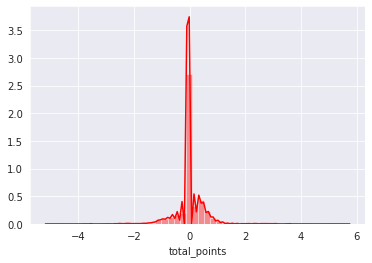

In [162]:
sns.distplot(y_test-predict,color='red')

In [163]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))

MAE: 0.27414886294455576
MSE: 0.2405847933497275
RMSE 0.4904944376338303
R2 Score 0.9622851603158411


In [164]:
explained_variance_score(y_test,predict)

0.9622852247775814

In [165]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predict})


In [166]:
df.head(50)

,Actual,Predicted
41277,0,0.025741
29364,1,0.498182
35326,0,0.064401
37955,6,5.574571
26024,0,0.029741
9270,8,7.672839
22739,2,2.821336
34643,7,7.109469
43957,0,0.036477
34123,0,0.069450


In [167]:
y=pd.DataFrame(scaler.inverse_transform(scaled),columns=gws1['feature_names'])


NameError: ignored

In [ ]:
x_new=pd.read_csv('/content/drive/My Drive/gw1.csv',encoding = "ISO-8859-1")

In [ ]:
x_new.head()


In [ ]:
x1=x_new.drop(['total_points','name'],axis=1)
y_test1=x_new['total_points']

In [ ]:
x1.head()

In [ ]:
x1.drop(['kickoff_time','ea_index'], axis=1,inplace=True)

In [ ]:
x1['kickoff_time_formatted']=pd.to_datetime(x1['kickoff_time_formatted'])


In [ ]:
x1['kickoff_time'] = x1.kickoff_time_formatted.dt.hour


In [ ]:
def was_home(x):
  if x=="FALSE":
    return 0
  else:
    return 1

In [ ]:
x1['home']=x1['was_home'].apply(was_home)

In [ ]:
x1['kickoff_time']=x1['kickoff_time'].apply(time)


In [ ]:
x1.drop('kickoff_time_formatted',axis=1,inplace=True)


In [ ]:
x1.drop(['element','id','was_home'],axis=1,inplace=True)

In [ ]:
x1.head()

In [ ]:
predict1=model.predict(x1)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': predict1})


In [ ]:
df1

In [ ]:
sns.distplot(y_test1-predict1)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
print('MAE:',mean_absolute_error(y_test1,predict1))
print('MSE:',mean_squared_error(y_test1,predict1))
print('RMSE',np.sqrt(mean_squared_error(y_test1,predict1)))
print('R2 Score',r2_score(y_test1,predict1))
